## PR: Implementation

In [1]:
from datetime import datetime

from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
V = 10
B = 0.9
N = 10000

def gen_data_pr(V, B, N):
    X = np.zeros((N, 3), dtype=int)
    for n in xrange(N):
        p = q = np.random.randint(V)
        while p == q:
            q = np.random.randint(V)
        p, q = sorted([p, q])
        y = np.random.binomial(1, B)
        X[n,:] = np.array([p,q,y])
    return X

X = gen_data_pr(V, B, N)

In [3]:
def get_R_nrm(R, d=None):
    V = R.shape[0]
    R = R.astype(float)
    R += np.eye(V) * R.sum(axis=0) # Add self-edge equal to sum of victories
    Rt = R.T
    idx = Rt.sum(axis=0) > 0
    Rt[:,idx] /= Rt[:,idx].sum(axis=0)
    R_nrm = Rt.T
    
    if d:
        assert d > 0 and d < 1
        R_nrm *= d
        R_nrm += (1 - d) / V
        
    return R_nrm

R = utils.get_interactions(X)
R_nrm = get_R_nrm(R)
R_nrm

array([[ 0.08143652,  0.10976227,  0.10116338,  0.12544259,  0.08598887,
         0.10622155,  0.09711684,  0.09357613,  0.1016692 ,  0.09762266],
       [ 0.00938272,  0.18716049,  0.0962963 ,  0.09333333,  0.10716049,
         0.09679012,  0.10567901,  0.1091358 ,  0.10024691,  0.09481481],
       [ 0.00943865,  0.01341282,  0.27968207,  0.09538003,  0.09538003,
         0.10879285,  0.10332837,  0.09836066,  0.0958768 ,  0.10034774],
       [ 0.00876339,  0.01071081,  0.00827653,  0.37828627,  0.0993184 ,
         0.10321324,  0.09834469,  0.08714703,  0.09834469,  0.10759494],
       [ 0.00729167,  0.00989583,  0.01458333,  0.01302083,  0.45208333,
         0.1015625 ,  0.1046875 ,  0.0984375 ,  0.10208333,  0.09635417],
       [ 0.01085348,  0.00888012,  0.01381352,  0.0123335 ,  0.00641342,
         0.55352738,  0.100148  ,  0.09422792,  0.09817464,  0.10162802],
       [ 0.0079602 ,  0.00945274,  0.01044776,  0.01393035,  0.00845771,
         0.01094527,  0.64278607,  0.1039801 

In [35]:
def power_method(R_nrm, threshold=0.001, print_x=False, print_k=False):
    V = R_nrm.shape[0]
    x = np.zeros(V) + 1. / V
    k = 0
    while True:
        prev = x
        if print_x:
            print x
        x = x.dot(R_nrm)
        if np.linalg.norm((x - prev)) < threshold:
            break
        k += 1
    if print_k:
        print k
    return pd.Series(x).sort_values(ascending=False)

power_method(R_nrm)

9    0.533782
8    0.163765
7    0.114080
6    0.049188
5    0.039585
4    0.029866
3    0.028770
2    0.023326
0    0.011068
1    0.006571
dtype: float64

In [5]:
def np_method(R_nrm):
    eigval, eigvec = np.linalg.eig(R_nrm.T)
    eigval = pd.Series(eigval)
    ev = pd.Series(eigvec[:,eigval.idxmax()])
    return (ev / ev.sum()).sort_values(ascending=False) # Normalize to simplex

np_method(R_nrm)

9    0.518901
8    0.183614
7    0.097802
6    0.064655
5    0.042723
4    0.027646
3    0.024644
2    0.018462
1    0.012613
0    0.008939
dtype: float64

In [6]:
V = 10
B = 0.9
N = 1000
X = gen_data_pr(V, B, N)
R = utils.get_interactions(X)
R_nrm = get_R_nrm(R)
pw_out = power_method(R_nrm)
np_out = np_method(R_nrm)
pw_out

9    0.533782
8    0.163765
7    0.114080
6    0.049188
5    0.039585
4    0.029866
3    0.028770
2    0.023326
0    0.011068
1    0.006571
dtype: float64

In [7]:
def get_error(ordering):
    V = len(ordering)
    return sum(np.abs(ordering.index - np.arange(V)[::-1]))

get_error(pw_out)

2

## Eigenvectors of various graphs

In [ ]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

In [ ]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

In [ ]:
R = np.array([
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 1, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

In [ ]:
R = np.array([
        [0, 0, 0, 0],
        [1, 0, 1, 0],
        [1, 0, 0, 1],
        [1, 1, 0, 0]])
R_nrm = get_R_nrm(R)
power_method(R_nrm)

## Simulations

- Power method
- Error = .9, .7
- N = 10, 100, 1000, 10000
- V = 100

In [51]:
V = 100
B = .9
N = 10

def run_experiment(V, B, N):
    X = gen_data_pr(V, B, N)
    R = utils.get_interactions(X)
    R_nrm = get_R_nrm(R)
    return get_error(power_method(R_nrm))
    
run_experiment(V, B, N)

3956

In [52]:
V = 100
B = .9 

POINTS = [10, 100, 500, 1000, 2500, 5000, 10000]

def run_trial(V, B):
    errors = []
    for N in POINTS:
        results = [run_experiment(V, B, N) for _ in xrange(5)]
        errors.append(sum(results) / float(len(results)))
#     plt.plot(points, errors)
    return errors

run_trial(V, B)

[4208.3999999999996,
 2506.8000000000002,
 1663.5999999999999,
 1300.8,
 1053.5999999999999,
 832.0,
 609.20000000000005]

## Trials

In [53]:
B_vals = [1, .9, .7]

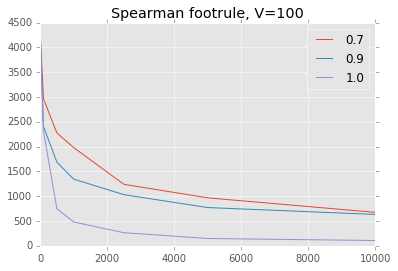

In [54]:
results = {}
V = 100
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))

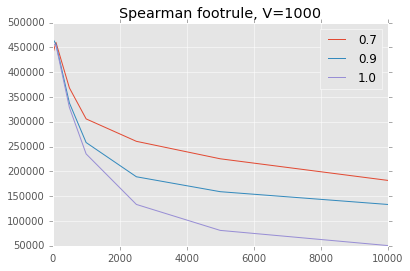

In [55]:
results = {}
V = 1000
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))

## Convergence times

In [60]:
def make_tril_R(n):
    return np.tril(np.ones((n,n))) - np.eye(n)

POINTS = [2**i for i in xrange(1,11)]
POINTS

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [61]:
def test_k(n, threshold):
    R = make_tril_R(n)
    R_nrm = get_R_nrm(R)
    power_method(R_nrm, threshold=threshold, print_x=False, print_k=True)
    
test_k(4, 0.001)

15


In [62]:
for n in POINTS:
    test_k(n, 0.001)

1
15
34
65
115
191
293
392
386
238


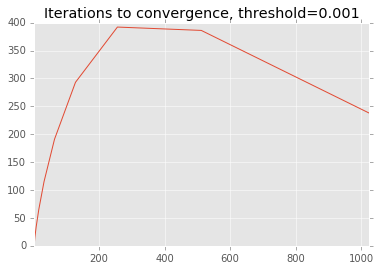

In [63]:
results = pd.Series([
1,
15,
34,
65,
115,
191,
293,
392,
386,
238,
])
results.index = POINTS
results.plot(title='Iterations to convergence, threshold=0.001')

In [44]:
for n in POINTS:
    test_k(n, 0.0001)

1
21
49
99
186
338
595
1017
1676
2612


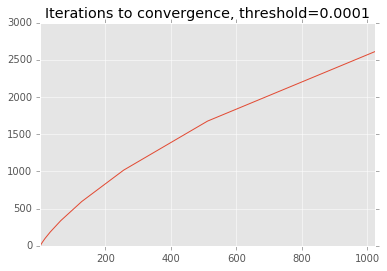

In [64]:
results = pd.Series([
1,
21,
49,
99,
186,
338,
595,
1017,
1676,
2612
])
results.index = POINTS
results.plot(title='Iterations to convergence, threshold=0.0001')